# Задания

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [2]:
df = pd.read_csv('..\datasets\credit_scoring.csv')

print(f"Клиенты, которым должны одобрить заявку на кредит: {df[(df['Возраст'] > 18) & (df['Месячный доход'] > 10000)]['Имя'].tolist()}.")

Клиенты, которым должны одобрить заявку на кредит: ['Ольга', 'Петр'].


## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

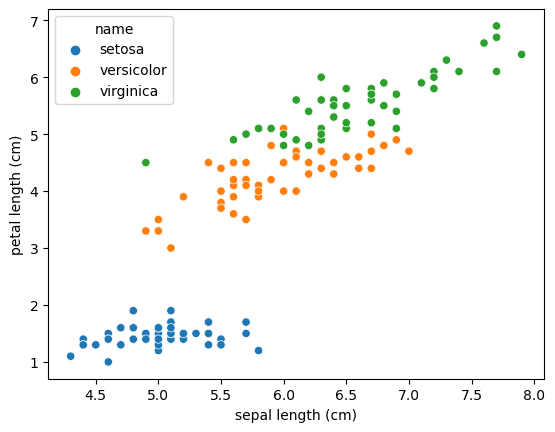

In [3]:
# Код тут

import seaborn as sns
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data)

df.columns = data.feature_names

df['target'] = data.target

df['name'] = df['target'].apply(lambda x : data.target_names[x])

sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='name')

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [4]:
# Код тут

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[['sepal length (cm)', 'petal length (cm)']]

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

round(accuracy_score(y_test, y_pred), 3)

0.967

## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

In [5]:
# Код тут

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(
        model, train_data, train_labels, test_data, test_labels,
        colors=ListedColormap(['red', 'blue', 'yellow']),
        light_colors=ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
):
    train_data = train_data.to_numpy()
    test_data = test_data.to_numpy()
    # set figure size
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    # plot decision surface on the train data
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    plt.title('Train data, accuracy={:.2f}'.format(accuracy_score(train_labels, model.predict(train_data))))

    # plot decision surface on the test data
    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    plt.title('Test data, accuracy={:.2f}'.format(accuracy_score(test_labels, model.predict(test_data))))

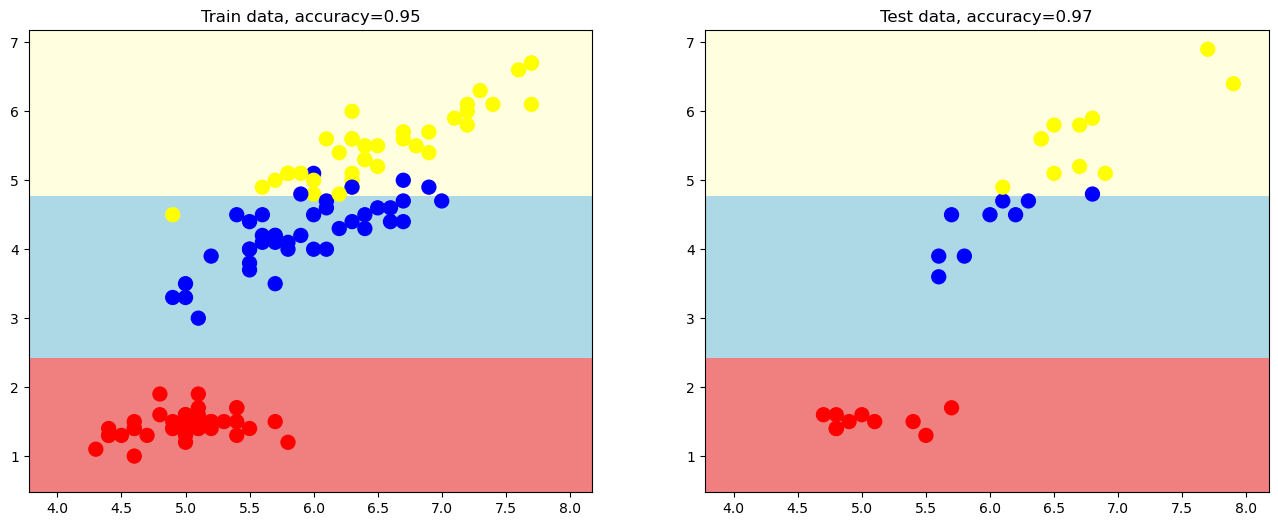

In [6]:
plot_decision_surface(clf, X_train, y_train, X_test, y_test)

In [7]:
from sklearn import tree

text_representation = tree.export_text(clf)

print(text_representation)

|--- feature_1 <= 2.45
|   |--- class: 0
|--- feature_1 >  2.45
|   |--- feature_1 <= 4.75
|   |   |--- class: 1
|   |--- feature_1 >  4.75
|   |   |--- class: 2



[Text(0.4, 0.8333333333333334, 'sepal width (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'sepal width (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica')]

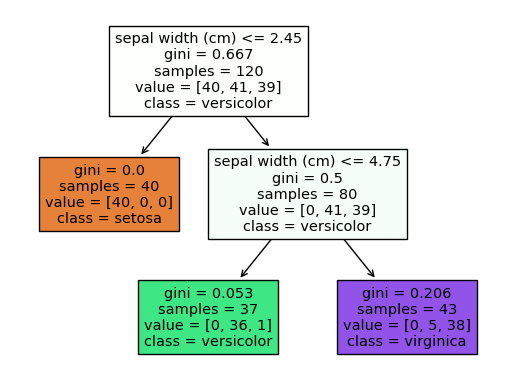

In [8]:
tree.plot_tree(clf,
               feature_names=data.feature_names,
               class_names=data.target_names,
               filled=True)

In [9]:
print(f"У получившегося дерева {clf.get_n_leaves()} листа.")

У получившегося дерева 3 листа.


## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 1000 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

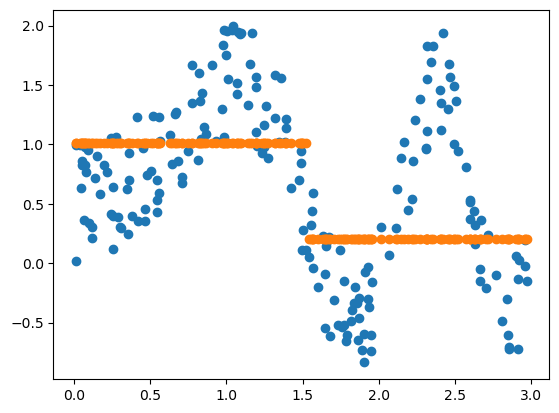

In [10]:
# Код тут

def generate_sin(sample_size, n=1):
    np.random.seed(42)
    X = np.random.random((sample_size, n))*3
    coeffs = 1 + 2 * np.random.random((n, 1))
    y = np.sin(np.matmul(X*X, coeffs)) + np.random.random((sample_size, 1))
    return X, y

X, y = generate_sin(1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=1, random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_test, y_test)
ax.scatter(X_test, y_pred)

[Text(0.5, 0.75, 'x[0] <= 1.533\nsquared_error = 0.544\nsamples = 800\nvalue = 0.615'),
 Text(0.25, 0.25, 'squared_error = 0.209\nsamples = 408\nvalue = 1.01'),
 Text(0.75, 0.25, 'squared_error = 0.563\nsamples = 392\nvalue = 0.204')]

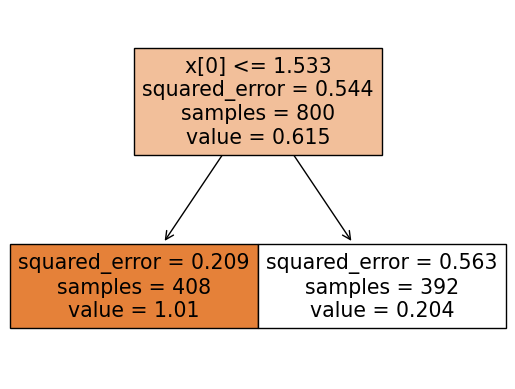

In [11]:
tree.plot_tree(reg, filled=True)

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

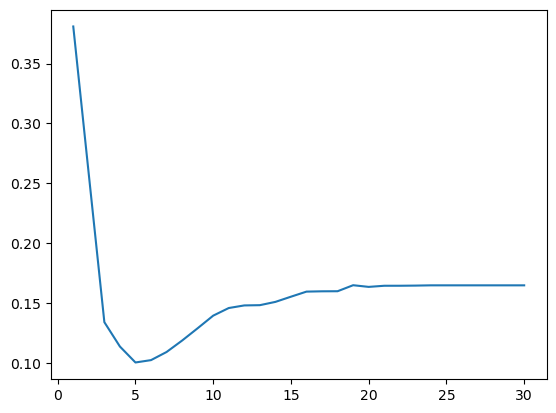

In [12]:
# Код тут

from sklearn.metrics import mean_squared_error

dict = {}

for i in range(1, 31):
    reg = DecisionTreeRegressor(max_depth=i, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    dict.update({i: mse})

fig, ax = plt.subplots()
ax.plot(dict.keys(), dict.values())

In [13]:
print(f"Глубина дерева, на котором MSE на тестовой выборке наилучший: {min(dict, key=dict.get)}.")

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5.


## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

In [14]:
# Код тут

from sklearn.ensemble import BaggingRegressor

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=42))

bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mse

0.08985886439602993

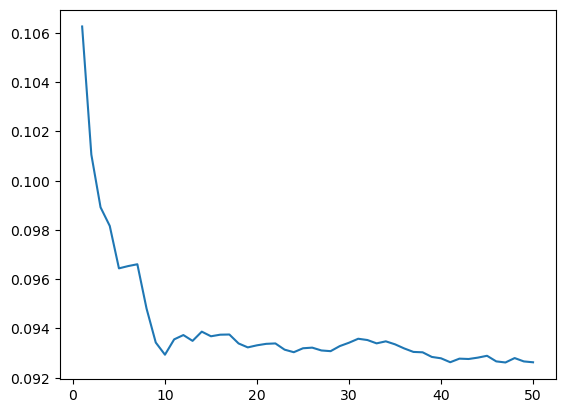

In [15]:
dict = {}

for i in range(1, 51):
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=42), 
                               n_estimators=i, bootstrap=True, random_state=42)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    dict.update({i: mse})

fig, ax = plt.subplots()
ax.plot(dict.keys(), dict.values())

In [16]:
print(f"Количество деревьев решений, при котором MSE на тестовой выборке наилучший: {min(dict, key=dict.get)}.")

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47.


## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [17]:
# Код тут

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

round(mse, 3)

0.091